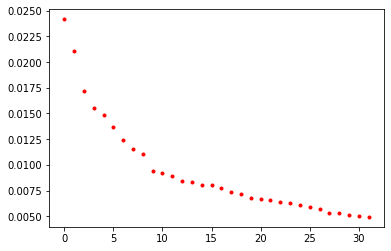

In [121]:
import sys
sys.path.append("..")
import os

import lauetools.LaueTools.IOimagefile as IOimage

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy import fft

from sklearn import metrics


def reduce(im, sx, sy, lp, hp):
    SX, SY = im.shape
    im_ = im.reshape(sx, SX // sx, sy,SY // sy).mean(-1).mean(1)
    #ss=cv2.dct(im_)
    ss=fft.dctn(im_)
    ss[:lp, :] = 0.
    ss[:, :lp] = 0.
    ss[hp:, :] = 0.
    ss[:, hp:] = 0.
    #return cv2.idct(ss), ss[lp: hp, lp: hp].ravel()
    return fft.idctn(ss), ss[lp: hp, lp: hp].ravel()

features=np.load('features4096.npy')

features=features.reshape((64*146,4096))

from sklearn.decomposition import PCA

n_pca=32
pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(features)#components_

plt.plot(np.arange(n_pca), pca.explained_variance_ratio_,'r.')

In [122]:
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering

connectivity = grid_to_graph(n_x=64, n_y=146)



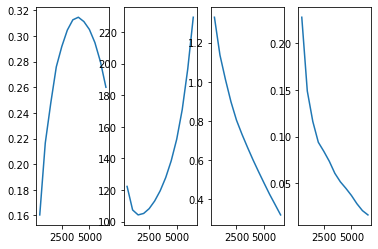

In [123]:
nums=range(500,7000,500)
sil=[]
cal_har=[]
dav_bou=[]
frac=[]
for n_clusters_ in nums:
    ward = AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)
    labels = ward.labels_
    sil.append(metrics.silhouette_score(pca_features, labels))#, metric='euclidean'))
    cal_har.append(metrics.calinski_harabasz_score(pca_features, labels))#, metric='euclidean'))
    dav_bou.append(metrics.davies_bouldin_score(pca_features, labels))#, metric='euclidean'))
    sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
    frac.append(len(sample_silhouette_values[sample_silhouette_values<0])/len(labels))
plt.subplot(1,4,1)
plt.plot(nums,sil)

plt.subplot(1,4,2)
plt.plot(nums,cal_har)

plt.subplot(1,4,3)
plt.plot(nums,dav_bou)

plt.subplot(1,4,4)
plt.plot(nums,frac)

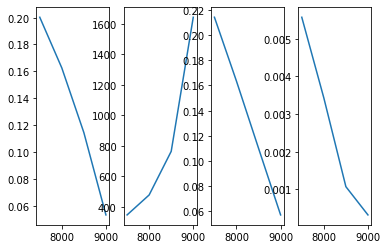

In [124]:
nums=range(7500,9500,500)
sil=[]
cal_har=[]
dav_bou=[]
frac=[]
for n_clusters_ in nums:
    ward = AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)
    labels = ward.labels_
    sil.append(metrics.silhouette_score(pca_features, labels))#, metric='euclidean'))
    cal_har.append(metrics.calinski_harabasz_score(pca_features, labels))#, metric='euclidean'))
    dav_bou.append(metrics.davies_bouldin_score(pca_features, labels))#, metric='euclidean'))
    sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
    frac.append(len(sample_silhouette_values[sample_silhouette_values<0])/len(labels))
plt.subplot(1,4,1)
plt.plot(nums,sil)

plt.subplot(1,4,2)
plt.plot(nums,cal_har)

plt.subplot(1,4,3)
plt.plot(nums,dav_bou)

plt.subplot(1,4,4)
plt.plot(nums,frac)

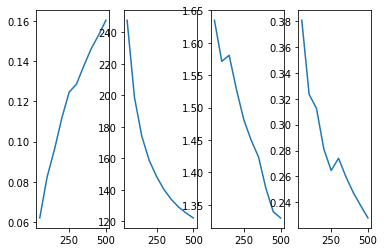

In [125]:
nums=range(50,550,50)
sil=[]
cal_har=[]
dav_bou=[]
frac=[]
for n_clusters_ in nums:
    ward = AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)
    labels = ward.labels_
    sil.append(metrics.silhouette_score(pca_features, labels))#, metric='euclidean'))
    cal_har.append(metrics.calinski_harabasz_score(pca_features, labels))#, metric='euclidean'))
    dav_bou.append(metrics.davies_bouldin_score(pca_features, labels))#, metric='euclidean'))
    sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
    frac.append(len(sample_silhouette_values[sample_silhouette_values<0])/len(labels))
plt.subplot(1,4,1)
plt.plot(nums,sil)

plt.subplot(1,4,2)
plt.plot(nums,cal_har)

plt.subplot(1,4,3)
plt.plot(nums,dav_bou)

plt.subplot(1,4,4)
plt.plot(nums,frac)

(9344,)
0.1604364654030068


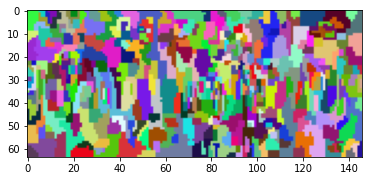

In [144]:
n_clusters_=500

ward = AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)

labels = ward.labels_
print(labels.shape)
grains=labels.reshape((64,146))
colors=np.random.uniform(size=(n_clusters_,3))
sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
sample_silhouette_values=sample_silhouette_values.reshape((64,146))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        if sample_silhouette_values[i,j] > 0:
            im[i,j]=colors[grains[i,j]]
        else:
            im[i,j]=colors[grains[i,j]]#np.array([1.,1.,1.])
plt.imshow(im)

print(metrics.silhouette_score(pca_features, labels))#, metric='euclidean'))

(9344,)
0.1604364654030068


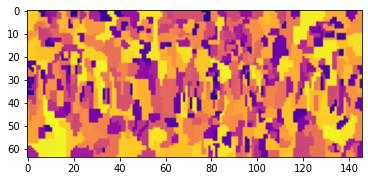

In [142]:
n_clusters_=500

ward = AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)

labels = ward.labels_
print(labels.shape)
grains=labels.reshape((64,146))
sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
sample_silhouette_values=sample_silhouette_values.reshape((64,146))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        if sample_silhouette_values[i,j] > 0:
            im[i,j]=np.array(cm.plasma(grains[i,j]/labels.max()))[0:3]
        else:
            im[i,j]=np.array(cm.plasma(grains[i,j]/labels.max()))[0:3]#np.array([1.,1.,1.])
plt.imshow(im)

print(metrics.silhouette_score(pca_features, labels))#, metric='euclidean'))

(9344,)
0.21652296777498828


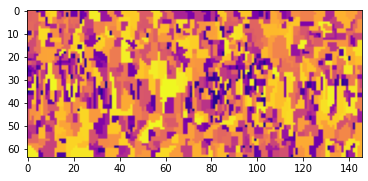

In [143]:
n_clusters_=1000

ward = AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)

labels = ward.labels_
print(labels.shape)
grains=labels.reshape((64,146))
sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
sample_silhouette_values=sample_silhouette_values.reshape((64,146))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        if sample_silhouette_values[i,j] > 0:
            im[i,j]=np.array(cm.plasma(grains[i,j]/labels.max()))[0:3]
        else:
            im[i,j]=np.array(cm.plasma(grains[i,j]/labels.max()))[0:3]#np.array([1.,1.,1.])
plt.imshow(im)

print(metrics.silhouette_score(pca_features, labels))#, metric='euclidean'))

-0.0031142613182576803


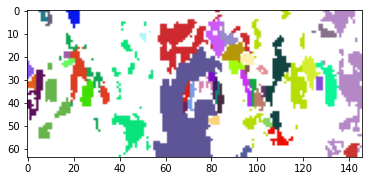

In [118]:


for i in range(64):
    for j in range(146):
        if sample_silhouette_values[i,j] > 0:
            im[i,j]=colors[grains[i,j]]
        else:
            im[i,j]=np.array([1.,1.,1.])
plt.imshow(im)

print(metrics.silhouette_score(pca_features, labels))#, metric='euclidean'))

9343
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 2

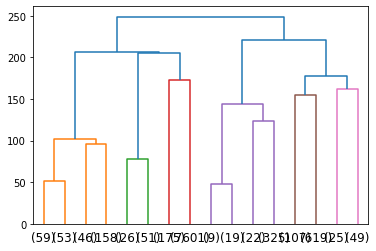

In [137]:
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=10, n_clusters=None,connectivity=connectivity, linkage='ward')

ward = model.fit(pca_features)
labels = ward.labels_
print(ward.children_.shape[0])
print(np.unique(labels))

plot_dendrogram(model, truncate_mode='level', p=3)


In [91]:
import matplotlib.cm as cm
print(np.array(cm.viridis(0.8)[0:3]))

[0.477504 0.821444 0.318195]


In [86]:
n_clusters_=6000

ward = AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)

labels = ward.labels_
grains=labels.reshape((64,146))
im
for i in range(64):
    for j in range(146):
        

(0.9359156862745098, 0.9280725490196079, 0.0, 1.0)


In [82]:
y_lower = 10
n_clusters=400
ward = AgglomerativeClustering(n_clusters=n_clusters, connectivity=connectivity, linkage='ward').fit(pca_features)

cluster_labels = ward.labels_
sample_silhouette_values = metrics.silhouette_samples(pca_features, cluster_labels)
print(np.array(sample_silhouette_values).min())
print(metrics.silhouette_score(pca_features, cluster_labels))
print(len(sample_silhouette_values[sample_silhouette_values<0])/9344)
"""
import matplotlib.cm as cm

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
    sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
"""

-0.49305373401875785
0.12335842564057871
0.22142551369863014


'\nimport matplotlib.cm as cm\n\nfor i in range(n_clusters):\n    # Aggregate the silhouette scores for samples belonging to\n    # cluster i, and sort them\n    ith_cluster_silhouette_values =     sample_silhouette_values[cluster_labels == i]\n\n    ith_cluster_silhouette_values.sort()\n\n    size_cluster_i = ith_cluster_silhouette_values.shape[0]\n    y_upper = y_lower + size_cluster_i\n\n    color = cm.nipy_spectral(float(i) / n_clusters)\n    plt.fill_betweenx(np.arange(y_lower, y_upper),\n                        0, ith_cluster_silhouette_values,\n                        facecolor=color, edgecolor=color, alpha=0.7)\n\n    # Label the silhouette plots with their cluster numbers at the middle\n    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))\n\n    # Compute the new y_lower for next plot\n    y_lower = y_upper + 10  # 10 for the 0 samples\n'